In [20]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

In [21]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()


In [22]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.



In [23]:
x_train = x_train[..., tf.newaxis] #adds a additional axis (60000,28,28) --> (60000,28,28,1)
x_test = x_test[..., tf.newaxis]
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [24]:
tf.random.normal(shape=x_train.shape)

<tf.Tensor: shape=(60000, 28, 28, 1), dtype=float32, numpy=
array([[[[-1.18151397e-01],
         [-9.79202688e-01],
         [ 1.00775075e+00],
         ...,
         [ 1.97426927e+00],
         [ 7.51331925e-01],
         [-4.91977818e-02]],

        [[ 5.38501859e-01],
         [ 1.57548749e+00],
         [ 1.29861343e+00],
         ...,
         [-1.70089215e-01],
         [-9.42378402e-01],
         [ 4.87668455e-01]],

        [[-1.35524571e+00],
         [ 3.35313511e+00],
         [ 4.63355869e-01],
         ...,
         [-5.23481548e-01],
         [ 6.80727124e-01],
         [ 1.20094228e+00]],

        ...,

        [[-1.63437867e+00],
         [ 4.19580817e-01],
         [ 4.65719588e-02],
         ...,
         [ 9.33250785e-01],
         [ 3.24611545e-01],
         [ 1.12152171e+00]],

        [[-2.25418150e-01],
         [-5.21438181e-01],
         [ 3.27103406e-01],
         ...,
         [-3.37530188e-02],
         [-1.33508050e+00],
         [-7.66949058e-01]],

      

In [25]:
noise_factor = 0.2
x_train_noisy = x_train  +  noise_factor * tf.random.normal(shape=x_train.shape)
# noise factor multiplication result in increased spread in noise distribution
# result in 0.2^2 increase of variance, mean doesn't chnage (mean = 0)
x_test_noisy = x_test  +  noise_factor * tf.random.normal(shape=x_test.shape)

x_train_noisy = tf.clip_by_value(x_train_noisy, clip_value_min=0., clip_value_max=1.)
x_test_noisy = tf.clip_by_value(x_test_noisy, clip_value_min=0., clip_value_max=1.)

In [26]:
x_test_noisy.shape

TensorShape([10000, 28, 28, 1])

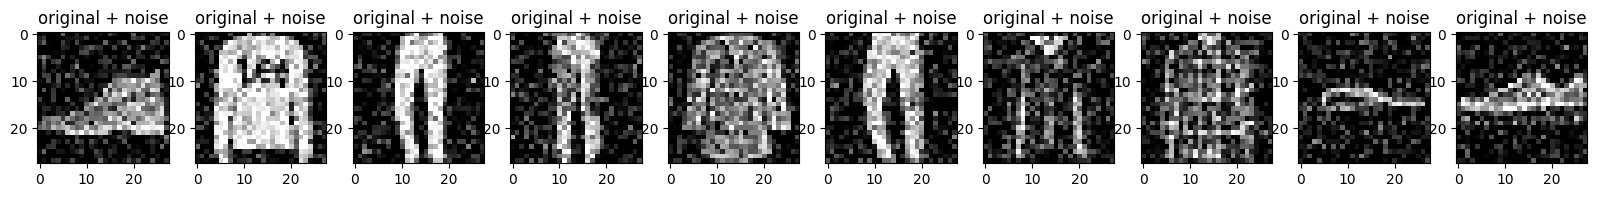

In [27]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.title("original + noise")
    plt.imshow(tf.squeeze(x_test_noisy[i]))
    plt.gray()
plt.show()

In [28]:
class Denoise(Model):
    def __init__(self):
        super(Denoise, self).__init__()
        self.encoder = tf.keras.Sequential([
          layers.Input(shape=(28, 28, 1)),
          layers.Conv2D(16, (3, 3), activation='relu', padding='same', strides=2),
          layers.Conv2D(8, (3, 3), activation='relu', padding='same', strides=2)])

        self.decoder = tf.keras.Sequential([
          layers.Conv2DTranspose(8, kernel_size=3, strides=2, activation='relu', padding='same'),
          layers.Conv2DTranspose(16, kernel_size=3, strides=2, activation='relu', padding='same'),
          layers.Conv2D(1, kernel_size=(3, 3), activation='sigmoid', padding='same')])

    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded


In [29]:
autoencoder = Denoise()

In [30]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

In [31]:
autoencoder.fit(x_train_noisy, x_train,
                epochs=30,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

Epoch 1/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 50s 25ms/step - loss: 0.0350 - val_loss: 0.0093
Epoch 2/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 53s 28ms/step - loss: 0.0090 - val_loss: 0.0085
Epoch 3/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 78s 26ms/step - loss: 0.0084 - val_loss: 0.0081
Epoch 4/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 25ms/step - loss: 0.0080 - val_loss: 0.0079
Epoch 5/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 25ms/step - loss: 0.0078 - val_loss: 0.0077
Epoch 6/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 25ms/step - loss: 0.0077 - val_loss: 0.0076
Epoch 7/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 25ms/step - loss: 0.0076 - val_loss: 0.0076
Epoch 8/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 25ms/step - loss: 0.0075 - val_loss: 0.0075
Epoch 9/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 26ms/step - loss: 0.0074 - val_loss: 0.0074
Epoch 10/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 46s 25ms/step - loss: 0.0074 - val_loss: 0.0073
Epoch 11/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 25ms/step - loss: 0.0073 - val_loss: 0.0073
Epoch 12

In [32]:
autoencoder.encoder.summary()


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 14, 14, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 7, 7, 8)             │           1,160 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,320 (5.16 KB)

 Trainable params: 1,320 (5.16 KB)

 Non-trainable params: 0 (0.00 B)

In [33]:
autoencoder.decoder.summary()


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_transpose_2 (Conv2DTranspose) │ (32, 14, 14, 8)             │             584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_3 (Conv2DTranspose) │ (32, 28, 28, 16)            │           1,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (32, 28, 28, 1)             │             145 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,897 (7.41 KB)

 Trainable params: 1,897 (7.41 KB)

 Non-trainable params: 0 (0.00 B)

In [34]:
encoded_imgs = autoencoder.encoder(x_test_noisy).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

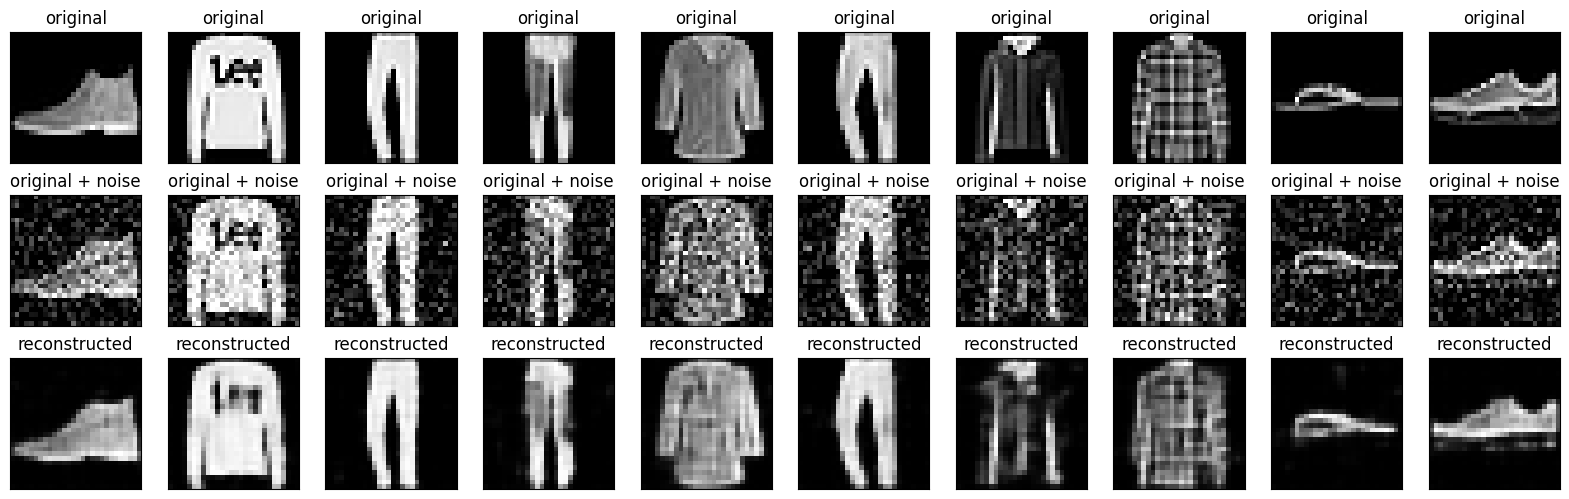

In [35]:
n = 10
plt.figure(figsize=(20, 6))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i + 1)
    plt.title("original")
    plt.imshow(tf.squeeze(x_test[i]))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display original + noise
    ax = plt.subplot(3, n, i + n + 1)
    plt.title("original + noise")
    plt.imshow(tf.squeeze(x_test_noisy[i]))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    bx = plt.subplot(3, n, i + 2*n + 1)
    plt.title("reconstructed")
    plt.imshow(tf.squeeze(decoded_imgs[i]))
    plt.gray()
    bx.get_xaxis().set_visible(False)
    bx.get_yaxis().set_visible(False)
plt.show()

In [36]:
import numpy as np
from sklearn.metrics import mean_squared_error

# Assuming `autoencoder` is your trained model and `x_test` and `x_test_noisy` are your test datasets

# Generate predictions for the test set
decoded_imgs = autoencoder.predict(x_test_noisy)

# Calculate the Mean Squared Error (MSE) between the original and reconstructed images
mse_loss = mean_squared_error(x_test.reshape(-1, 28*28), decoded_imgs.reshape(-1, 28*28))

print(f"Test MSE Loss: {mse_loss}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step
Test MSE Loss: 0.0067117041908204556


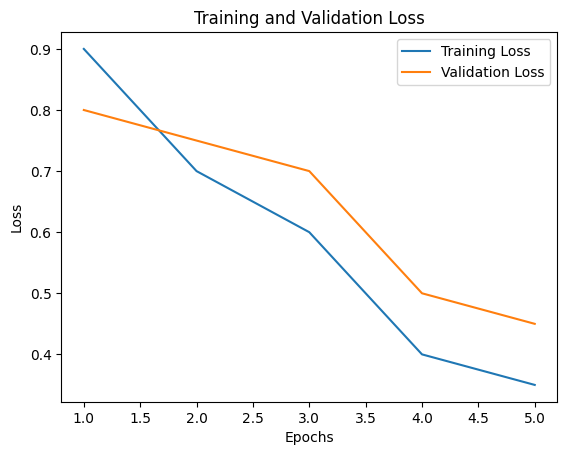

In [38]:
import matplotlib.pyplot as plt

# Assuming 'train_loss' and 'val_loss' are already available in your environment
# You mentioned they are lists containing the loss values
# Example: train_loss = [0.9, 0.7, 0.6, 0.4, 0.3]
#          val_loss = [0.8, 0.75, 0.7, 0.5, 0.45]

# Generate the plot
epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [39]:
noise_factor = 0.4  # Experiment with different values: 0.1, 0.2, 0.3, 0.5, etc.
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

# Clip the images to be between 0 and 1
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)


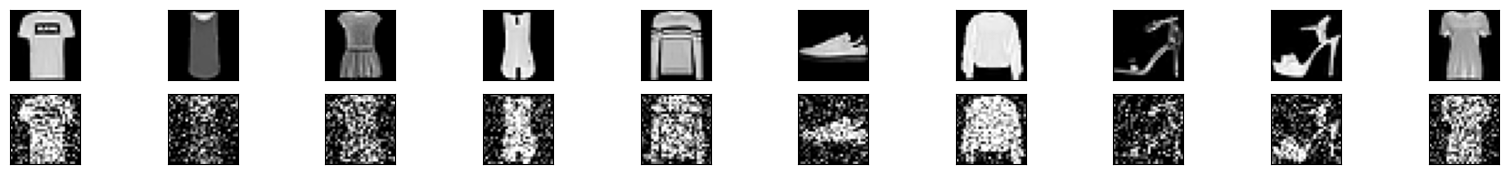

In [40]:
import matplotlib.pyplot as plt

def display_noisy_images(x_noisy, x_clean):
    n = 10
    plt.figure(figsize=(20, 2))
    for i in range(1, n + 1):
        # Display original
        ax = plt.subplot(2, n, i)
        plt.imshow(x_clean[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # Display noisy
        ax = plt.subplot(2, n, i + n)
        plt.imshow(x_noisy[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

# Display noisy images
display_noisy_images(x_train_noisy, x_train)


In [41]:
# Final selected noise_factor based on experiments
noise_factor = 0.3
